# EA Movie Recommendation Predict
© Explore Data Science Academy

## Autonomous Insights (Members)
Harmony Mncube

Lehlohonolo Radebe

Ndumiso Nkosi

Kgopotso Tlaka

Lesego Precious Lefike

Emmanuel Nkosi

Phindulo Tshivilinge

Yvonne Malinga


# Unsupervised Predict Student Solution

---
### Honour Code

We {**GM1**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EA Movie Recommendation Challenge

This project aims to build a recommendation system using collaborative filtering and matrix factorization techniques to predict movie ratings and provide personalized movie recommendations to users based on their past movie preferences. The dataset consists of user movie ratings, movie metadata, and user information. The goal is to achieve a low root mean squared error (RMSE) and enhance user engagement by suggesting relevant movies.. Your company has been awarded the contract to:

- 1. Analyse the given data;
- 2. Find potential errors in the data and clean the existing data set;
- 3. Determine if additional features can be added to improve the data set;
- 4. Build a model that is capable of predicting;
- 5. Compute the accuracy of the model;
- 6. Find what features were most important in the model’s prediction decision
- 7. Clarify the the model to a non-technical audience.

# Problem Statement
EA has challenged us to construct a recommendation algorithm based on content or collaborative filtering techniques. The goal is to accurately predict how a user will rate a movie they haven't seen based on their past preferences. Building a functional recommender system holds immense economic potential, exposing users to content they would enjoy and generating revenue while fostering platform affinity.

# Hypothesis

Building a functional recommendation algorithm based on content or collaborative filtering can generate immense economic potential by accurately predicting user ratings for unseen movies, leading to increased revenue and platform affinity.

# Introduction

In this era of technology-driven advancements, recommender systems emerge as pivotal tools, ensuring individuals can navigate the vast landscape of content and make informed choices that resonate with their preferences. Amongst the multitude of applications, one domain stands out prominently: movie content recommendations. This is where intelligent algorithms, akin to those employed by streaming giants like Netflix, Amazon Prime, Showmax, Disney, and others, work their magic to tailor personalized suggestions from an ocean of entertainment options.
The value and impact of building a functional recommender system extend far beyond the realm of convenience. It holds the key to unlocking immense economic potential, reshaping the way users engage with content and forging stronger connections between individuals and the platforms they rely upon. Imagine a world where users are seamlessly exposed to content that aligns perfectly with their tastes and desires, igniting a deeper level of engagement, cultivating higher satisfaction levels, and in turn, generating revenue and fostering unwavering platform affinity.

Let's embark on an extraordinary adventure that could reshape the landscape of entertainment, while leaving an indelible mark on the lives of millions of users worldwide.

<a id="cont"></a>

# Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing </a>

<a href=#three>4. Merging Data </a>

<a href=#four>5. Exploratory Data Analysis(EDA)</a>

<a href=#four>6. Word Cloud</a>

<a href=#five>7. Feature Engineering</a>

<a href=#seven>8. Model Building</a>

<a href=#seven>9. Model Explanation</a>

<a href=#eight>10. Conclusion</a>

<a href=#nine>11. Kaggle Submission</a>

<a href=#ten>12. References</a>

<a id="one"></a>
# 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
# Data processing libraries
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# Model calculation libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
from time import time

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
%matplotlib inline

# Modeling libarries
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans 
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

# Hyperparameter tuning
from surprise.model_selection import GridSearchCV

# warning library
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

In this project, we will make use of various Python libraries, such as:

Pandas a powerful open-source Python library widely used for data manipulation and analysis.

Scipy an open-source Python library that offers a wide range of scientific and mathematical functions, including optimization, integration, linear algebra, statistical analysis, and more, making it a valuable tool for scientific computing and data analysis.

NumPy for numerical computing that provides powerful arrays and mathematical functions, essential for handling large datasets and performing various numerical operations efficiently.

Matplotlib for data visualization, offering a wide range of plotting options to create high-quality charts, graphs, and visual representations of data.

Seaborn a powerful open-source Python data visualization library built on top of Matplotlib, providing an easy-to-use interface to create attractive statistical plots, enhancing the aesthetics and insightfulness of data visualizations.

WordCloud used for generating visually appealing word clouds, where the size of each word is proportional to its frequency in a given text, making it useful for visualizing word frequency patterns.

re (regular expression) provides support for regular expressions, enabling efficient text pattern matching and manipulation, facilitating tasks like search, find, and replace operations in strings.

Surprise for building and analyzing recommender systems, providing various collaborative filtering algorithms and evaluation metrics for effective movie and item recommendations.

Scikit-learn (sklearn) offers a wide range of tools and algorithms for data preprocessing, classification, regression, clustering, and more, making it a versatile choice for machine learning tasks.

Operator provides functional interfaces to perform common operations, such as arithmetic, comparisons, and item access, making it a convenient tool for working with custom data structures and functions.

Heapq implements the heap queue algorithm, providing efficient operations for adding, removing, and finding the smallest elements in a collection, making it useful for priority queue tasks.

Warnings to control how warning messages are displayed or handled during runtime, providing developers with useful information about potential issues or deprecations in their code.

<a id="two"></a>
# 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

To begin our data analysis, our first step involves loading the data from the CSV file into DataFrames. DataFrames provide a structured and organized representation of the CSV data, where each row corresponds to a record from the file, and each column represents a specific attribute or field. This also serves as a crucial foundation for our data analysis workflow, providing us with a versatile and efficient data structure to extract valuable insights and unlock the full potential of the data at hand.

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head(2)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739


In [3]:
df_movie = pd.read_csv('movies.csv')
df_movie.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [4]:
df_imdb = pd.read_csv('imdb_data.csv')
df_imdb.head(2)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game


In [5]:
df_tag = pd.read_csv('tags.csv')
df_tag.head(2)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [6]:
df_genome_tag = pd.read_csv('genome_tags.csv')
df_genome_tag.head(2)

,tagId,tag
0,1,007
1,2,007 (series)


In [7]:
df_genome_score = pd.read_csv('genome_scores.csv')
df_genome_score.head(2)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375


In [8]:
df_link = pd.read_csv('links.csv')
df_link.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [9]:
df_test = pd.read_csv('test.csv')
df_test.head(2)

,userId,movieId
0,1,2011
1,1,4144


<a id="one"></a>
# 3. Data Preprocessing
<a href=#cont>Back to Table of Contents</a>

This is a vital step as it ensures that the data used for analysis is accurate and reliable. By removing errors, inconsistencies, and missing values, we enhance the quality of the dataset, leading to more accurate and meaningful insights. Preprocessing also helps in transforming the data into a suitable format for machine learning algorithms, improving their performance and efficiency.

#####  Extract year from the title

We extract the year from the title column in the movies table to obtain the release year of each movie. This information is valuable for analyzing movie trends over time, grouping movies by release year, and providing additional context for movie recommendations based on user preferences.

In [10]:
# Extract the year from the 'title' column using regular expressions and convert to string
df_movie['year'] = df_movie['title'].str.extract(r'\((\d{4})\)$').fillna('')

# Drop the parentheses and year from the 'title' column
df_movie['title'] = df_movie['title'].str.replace(r'\s*\(\d{4}\)$', '')

# Display the updated dataframe
df_movie.head(2)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995


##### Pre process the budget column
<li>Removes commas from the 'budget' column.</li>
<li>Extracts only the numeric part from the 'budget' column.</li>
<li>Converts the 'budget' values to float.</li>
<li>Fills any missing (NaN) values with 0.</li>
<li>Finally, converts the 'budget' values to integers.</li>

We preprocess the budget column to convert the budget values into a numerical format (integer or float) that can be used for analysis

In [11]:
df_imdb['budget'] = df_imdb['budget'].str.replace(',', '').str.extract('(\d+)').astype(float).fillna(0).astype(int)
df_imdb.head(2)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,30000000,toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,65000000,board game|adventurer|fight|game


#####  Check null values

 By identifying and handling null values appropriately, we ensure that our data is complete and accurate

In [12]:
#Check for null values
def check_null_values(file_paths):
    null_counts = {}

    for file_path in file_paths:
        df = pd.read_csv(file_path)  # Assuming the files are in CSV format
        null_counts[file_path] = df.isnull().sum()

    return null_counts

In [13]:
file_paths = ['train.csv', 
              'test.csv', 
              'tags.csv',
              'movies.csv',
              'links.csv',
              'imdb_data.csv',
              'genome_tags.csv',
              'genome_scores.csv']
null_counts = check_null_values(file_paths)

# Print the null value counts for each file
for file_path, null_count in null_counts.items():
    print(f"Null values in {file_path}:")
    print(null_count)
    print()

Null values in train.csv:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Null values in test.csv:
userId     0
movieId    0
dtype: int64

Null values in tags.csv:
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Null values in movies.csv:
movieId    0
title      0
genres     0
dtype: int64

Null values in links.csv:
movieId      0
imdbId       0
tmdbId     107
dtype: int64

Null values in imdb_data.csv:
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

Null values in genome_tags.csv:
tagId    0
tag      0
dtype: int64

Null values in genome_scores.csv:
movieId      0
tagId        0
relevance    0
dtype: int64



#####  Handle Null Values
<li>Drop</li>

In [14]:
# Handle null values in tags.csv
df_tag.dropna(subset=['tag'], inplace=True)

# Handle null values in imdb_data.csv
df_imdb.dropna(subset=['runtime', 'budget'], inplace=True)

# Handle null values in links.csv
df_link.dropna(subset=['tmdbId'], inplace=True)

# Handle null values in genome_scores.csv
df_genome_score.dropna(inplace=True)

# Handle null values in genome_tags.csv (no null values in this DataFrame, so no action needed)

<a id="one"></a>
# 4. Merging Data
<a href=#cont>Back to Table of Contents</a>

Here we merged the dataset which is necessary when dealing with recommendation systems. These systems aim to predict user preferences based on past interactions with movies. By merging the relevant data, such as user ratings and movie information, into a single dataset or constructing a utility matrix, we can build a comprehensive representation of user-item interactions. This consolidated data is then used to train machine learning models to make personalized recommendations for users.

In [15]:
# Merge train data with movie data
df_train_merged_movie = df_train.merge(df_movie, on='movieId')
df_train_merged_movie.head(2)

,userId,movieId,rating,timestamp,title,genres,year
0,5163,57669,4.0,1518349992,In Bruges,Comedy|Crime|Drama|Thriller,2008
1,87388,57669,3.5,1237455297,In Bruges,Comedy|Crime|Drama|Thriller,2008


In [16]:
# Merge train data with IMDb data
df_train_merged_imdb = df_train.merge(df_imdb, on="movieId")
df_train_merged_imdb.head(2)

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman


In [17]:
# Merge movie data with IMDb data
df_movie_merged_imdb = df_movie.merge(df_imdb, on="movieId")
df_movie_merged_imdb.head(2)

,movieId,title,genres,year,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,30000000,toy|rivalry|cowboy|cgi animation
1,2,Jumanji,Adventure|Children|Fantasy,1995,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,65000000,board game|adventurer|fight|game


In [18]:
# Merge train data with movie data and then with IMDb data
df_train_final_merge = df_train.merge(df_movie, on='movieId').merge(df_imdb, on="movieId")
df_train_final_merge.head(2)

,userId,movieId,rating,timestamp,title,genres,year,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges,Comedy|Crime|Drama|Thriller,2008,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges,Comedy|Crime|Drama|Thriller,2008,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman


<a id="three"></a>
# 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section we'll be looking into the underlying patterns and characteristics of the movie dataset. By visualizing and summarizing the data, we can identify trends, distributions, and relationships between movie attributes, such as genre, ratings, and release year, which helps inform the design of the recommendation algorithm. EDA also allows us to detect outliers, missing values, and potential data quality issues, ensuring that the data used for movie recommendations is reliable and suitable for accurate predictions.

### 5.1 Investigating target variable (Ratings)

In [19]:
df_train_final_merge['rating'].describe() # Summary Statistics for Ratings

count    6.979973e+06
mean     3.484860e+00
std      1.067980e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

##### Visualise the target variable

Average rating in dataset: 3.4848600417222246


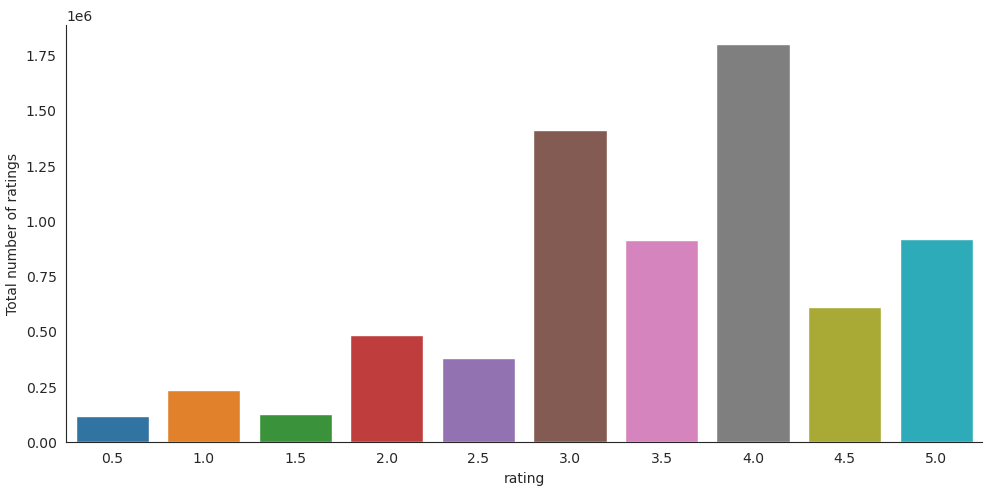

In [20]:
# Plotting histogram of ratings
with sns.axes_style('white'):
    g = sns.catplot(data=df_train_final_merge, x="rating", y=None, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(df_train_final_merge["rating"])}')

The rating distribution is left-skewed, indicating that most movies have received positive ratings. The highest frequency occurs around the 4.0 and 5.0 ratings, suggesting that a significant number of movies are well-received by users. However, there are relatively fewer movies with lower ratings, such as 1.0 to 3.0, indicating that the dataset is predominantly composed of positively reviewed films.

##### Check the number of unique values in the target variable

In [21]:
df_train_final_merge['rating'].nunique()

10

##### View the unique values

In [22]:
df_train_final_merge['rating'].unique()

array([4. , 3.5, 4.5, 0.5, 5. , 3. , 2. , 1. , 1.5, 2.5])

##### Count the occurrences of each unique value in the 'rating' column 

In [23]:
data = df_train_merged_movie['rating'].value_counts().sort_index(ascending=False)
data

5.0    1445230
4.5     880516
4.0    2652977
3.5    1270642
3.0    1959759
2.5     505578
2.0     656821
1.5     159731
1.0     311213
0.5     157571
Name: rating, dtype: int64

##### Renaming columns in the DataFrame 

It is essential to create a consolidated DataFrame that combines movie ratings and the number of ratings each movie has received. It helps to better understand the relationship between movie ratings and their popularity in the dataset, enabling us to make data-driven decisions and recommendations based on both user ratings and the frequency of ratings for each movie.

In [24]:
# Rename columns in df_train_final_merge
df_train_final_merge.rename(columns={'rating_x': 'rating', 'rating_y': 'Number_of_Ratings'}, inplace=True)

# Create dataframe to count the number of ratings for each movieId
n_ratings = pd.DataFrame(df_train_final_merge.groupby('movieId').count()['rating']).reset_index()

# Merge num_ratings with df_train_final_merge
df_train_final_merge = pd.merge(left=df_train_final_merge, right=n_ratings, on='movieId')

# rename columns
df_train_final_merge.rename(columns={'rating_x': 'rating', 'rating_y': 'Number_of_Ratings'}, inplace=True)

df_train_final_merge.head(2)

,userId,movieId,rating,timestamp,title,genres,year,title_cast,director,runtime,budget,plot_keywords,Number_of_Ratings
0,5163,57669,4.0,1518349992,In Bruges,Comedy|Crime|Drama|Thriller,2008,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253
1,87388,57669,3.5,1237455297,In Bruges,Comedy|Crime|Drama|Thriller,2008,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253


In [25]:
#drop duplicates on dataframe
data_1= df_train_final_merge.drop_duplicates('movieId')

data_1.head(2)

,userId,movieId,rating,timestamp,title,genres,year,title_cast,director,runtime,budget,plot_keywords,Number_of_Ratings
0,5163,57669,4.0,1518349992,In Bruges,Comedy|Crime|Drama|Thriller,2008,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253
4253,106343,5,4.5,1206238739,Father of the Bride Part II,Comedy,1995,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,30000000,fatherhood|doberman|dog|mansion,4648


### 5.2 Investigating Users

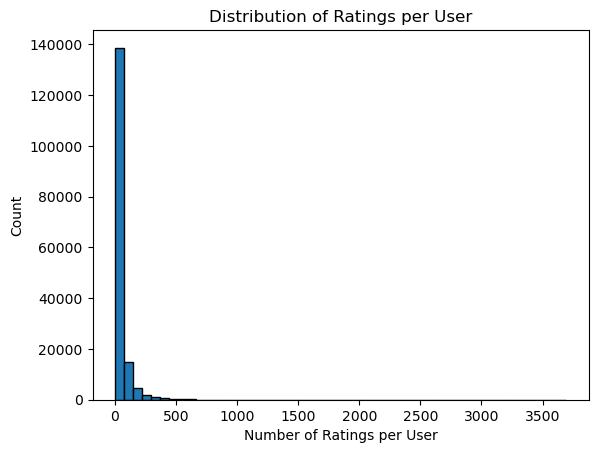

In [26]:
# User Distribution
user_counts = df_train_final_merge['userId'].value_counts().sort_index()

# Plotting histogram of user distribution
plt.hist(user_counts, bins=50, edgecolor='black')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Count')
plt.title('Distribution of Ratings per User')
plt.show()

### 5.3 Investigating genre

In [27]:
# Make a count of the genre keywords
genre_labels = set()
for s in df_movie['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
occurences, dum = count_word(df_movie, 'genres', genre_labels)
occurences[:15]

[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348],
 ['Horror', 5989],
 ['Documentary', 5605],
 ['Crime', 5319],
 ['(no genres listed)', 5062],
 ['Adventure', 4145],
 ['Sci-Fi', 3595],
 ['Children', 2935],
 ['Animation', 2929],
 ['Mystery', 2925],
 ['Fantasy', 2731]]

The analysis of genre keywords shows the top 15 most common genres in the dataset. Drama and Comedy are the most prevalent genres, followed by Thriller, Romance, and Action. It suggests that the dataset contains a diverse range of movies, with a focus on drama and comedy genres, providing valuable insights for content-based and genre-based recommendations.

In [28]:
df = df_imdb[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(df_movie[['movieId', 'genres', 'title']], on='movieId', how='inner')
df.head(2)

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji


In [29]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces between names
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])

# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))

df.head(2)

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[tomhanks, timallen, donrickles]",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story
1,2,"[robinwilliams, jonathanhyde, kirstendunst]",jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji


### 5.4 Investigating Movies

##### Number of movies released per year

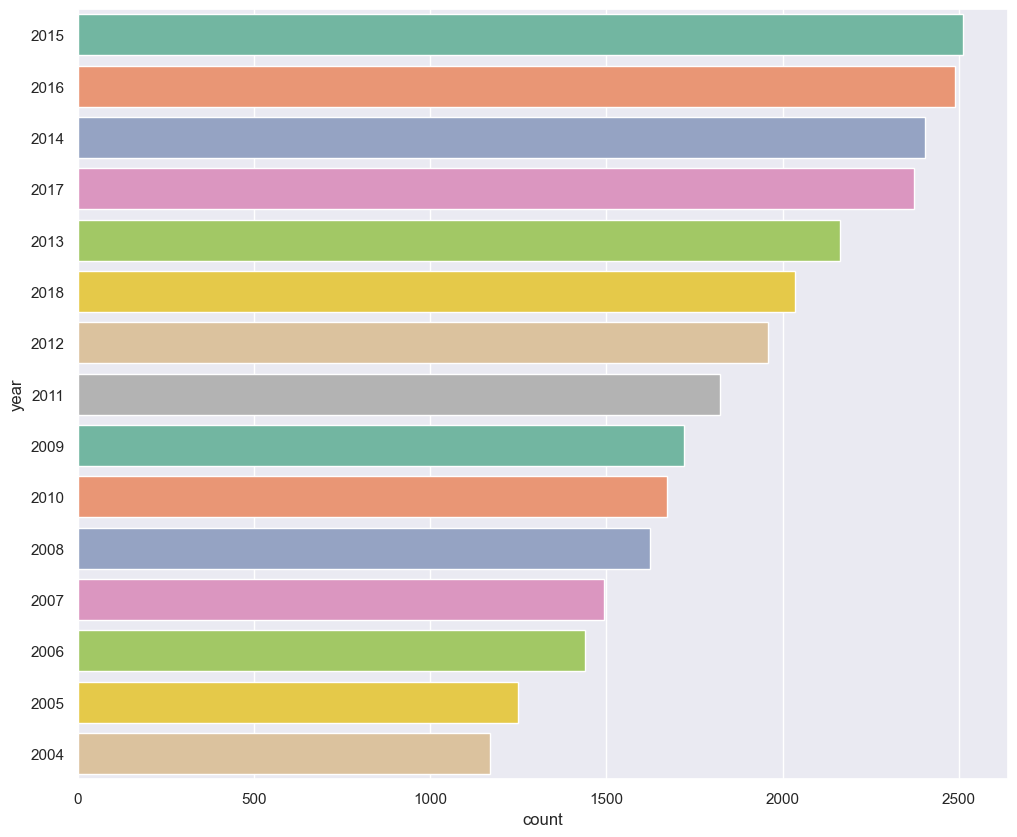

In [30]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="year", data= df_movie, palette="Set2", order=df_movie['year'].value_counts().index[0:15])

The plot indicates that the movie production industry has been consistently growing over the years, with the highest number of movies released in the year 2015. This trend suggests a positive growth in the movie industry during the period from 2004 to 2015, possibly due to increasing interest and investment in the entertainment sector.

##### Most-Rated Movies

In [31]:
# Distribution of Movies
movie_counts = df_movie['movieId'].value_counts().sort_index()

most_rated_movies = movie_counts.nlargest(10)  # Get top 10 most-rated movies
most_rated_movies_data = df_movie[df_movie['movieId'].isin(most_rated_movies.index)]
most_rated_movies_data[['movieId', 'title', 'genres']]

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy
5,6,Heat,Action|Crime|Thriller
6,7,Sabrina,Comedy|Romance
7,8,Tom and Huck,Adventure|Children
8,9,Sudden Death,Action
9,10,GoldenEye,Action|Adventure|Thriller


Based on the output, the top 10 most-rated movies consist of diverse genres, including Adventure, Animation, Children, Comedy, Fantasy, Romance, Drama, Crime, and Thriller. These popular movies cater to a broad audience, showcasing the appeal of a wide range of genres among users.

##### Visualise the ditribution of movies by genre

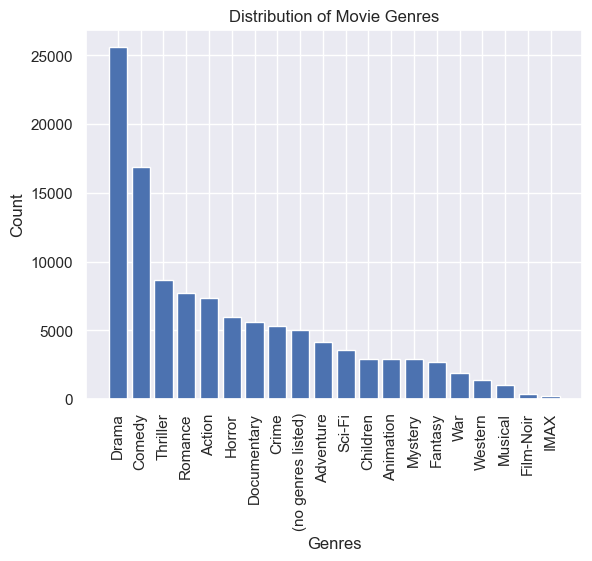

In [32]:
# Movie Genres Distribution
df_movie['genres'] = df_movie['genres'].str.split('|')
genre_counts = df_movie['genres'].explode().value_counts()

# Plotting bar plot of genre distribution
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=90)
plt.show()

From the bar plot, we can observe that the top five movie genres, ranked from highest to lowest, are Drama, Comedy, Thriller, Romance, and Action. Additionally, the genres Horror, Documentary, and Crime follow closely, showing their popularity among the movie dataset. 

### 5.5 Correlation of Features

This function gives a correlation map
    using all the features from merged data.

In [33]:
def correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

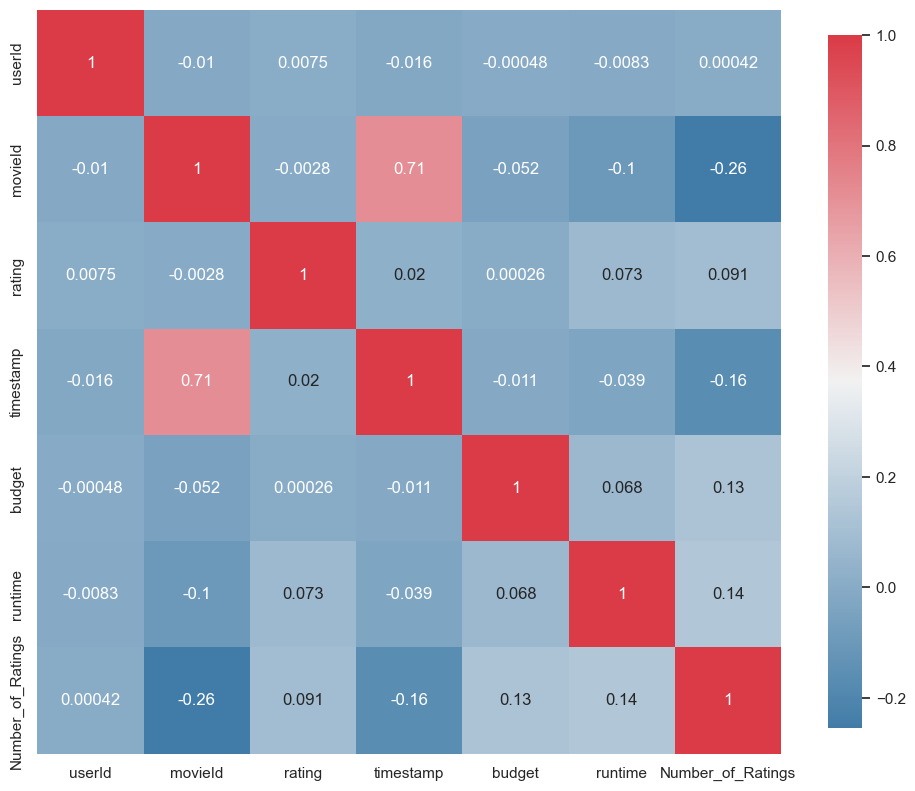

In [34]:
correlation_map(data_1[['userId','movieId','rating', 'timestamp', 'budget','runtime', 'Number_of_Ratings']])

The correlation map shows that there is no significant positive correlation among the features, except for a strong correlation between the "movieId" and "timestamp." This correlation suggests that movies with different lengths have different timestamps, indicating the possibility of movies ending at various times.

### 5.6 Detecting Outliers

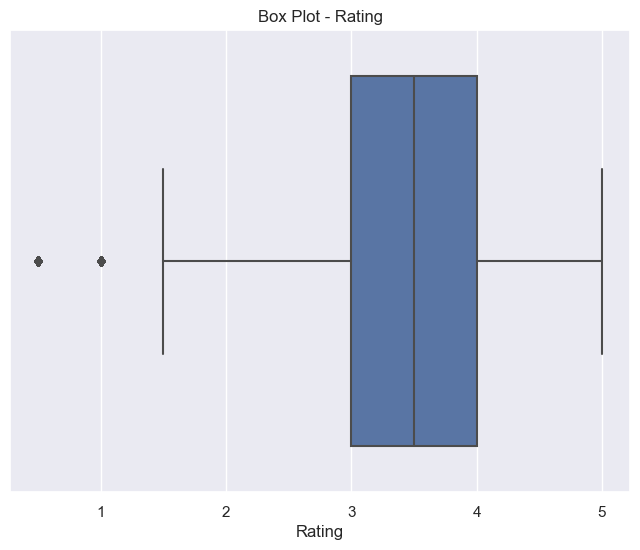

In [35]:
# Box plot for rating feature
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train_final_merge['rating'])
plt.xlabel('Rating')
plt.title('Box Plot - Rating')
plt.show()

We found a couple of outliers in the rating data, therefore below we are going to remove them

##### Remove outliers

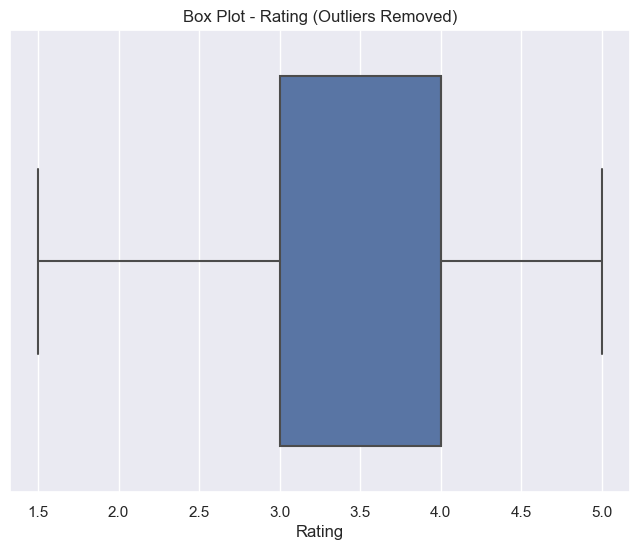

In [36]:
def remove_outliers(df, column_name):
    """
    Removes outliers from a given column in the DataFrame using the Interquartile Range (IQR) method.
    
    Parameters:
        df (DataFrame): The DataFrame containing the column to be processed.
        column_name (str): The name of the column for which outliers need to be removed.
        
    Returns:
        DataFrame: A new DataFrame with outliers removed from the specified column.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out the outliers
    df_filtered = df[(df[column_name] >= Q1 - 1.5 * IQR) & (df[column_name] <= Q3 + 1.5 * IQR)]
    
    return df_filtered

# Call the function to remove outliers from the 'rating' column
df_train_no_outliers = remove_outliers(df_train_final_merge, 'rating')

# Plot the box plot again for the cleaned 'rating' feature
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train_no_outliers['rating'])
plt.xlabel('Rating')
plt.title('Box Plot - Rating (Outliers Removed)')
plt.show()

<a id="one"></a>
# 6. Word Cloud
<a href=#cont>Back to Table of Contents</a>

##### Frequency of each genre

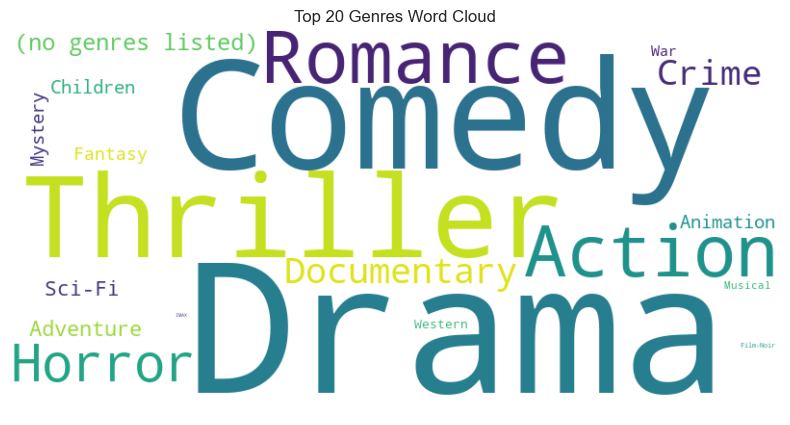

In [37]:
from wordcloud import WordCloud

# Drop rows with missing (NaN) values in the 'genres' column
df_movie_cleaned = df_movie.dropna(subset=['genres'])

# Flatten the list of lists
all_genres = [genre for sublist in df_movie_cleaned['genres'].tolist() for genre in sublist]

# Count the frequency of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Select the top 20 genres
top_20_genres = genre_counts.head(20)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_20_genres)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Genres Word Cloud')
plt.show()

##### Frequency of tags

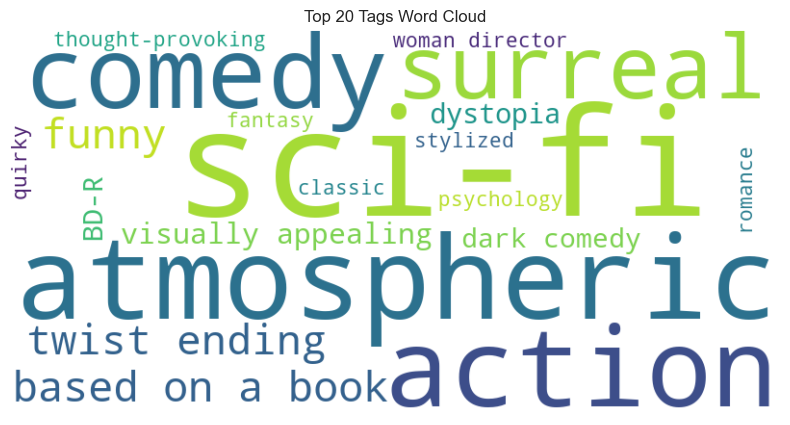

In [38]:
# Count the frequency of each tag
tag_counts = df_tag['tag'].value_counts()

# Select the top 20 tags
top_20_tags = tag_counts.head(20)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_20_tags)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Tags Word Cloud')
plt.show()

<a id="three"></a>
# 7. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Convert data types to strings: The code converts the columns 'title_cast', 'plot_keywords', 'genres', and 'director' to string data types for string handling operations.

In [39]:
# Merge two dataframes
df_1 = df_imdb[['movieId','title_cast','director', 'plot_keywords']]
df_1 = df_1.merge(df_movie[['movieId', 'genres', 'title']], on='movieId', how='inner')
df_1.head(2)

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,"[Adventure, Children, Fantasy]",Jumanji


Removing spaces between names: The code removes spaces between characters in the 'director' and 'title_cast' columns by converting them to lowercase and then joining the characters without spaces.

In [40]:
# Convert data types to strings for string handling
df_1['title_cast'] = df_1.title_cast.astype(str)
df_1['plot_keywords'] = df_1.plot_keywords.astype(str)
df_1['genres'] = df_1.genres.astype(str)
df_1['director'] = df_1.director.astype(str)

# Removing spaces between names
df_1['director'] = df_1['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df_1['title_cast'] = df_1['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df_1['title_cast'] = df_1['title_cast'].map(lambda x: x.split('|'))

# Discarding the pipes between the plot keywords' and getting only the first five words
df_1['plot_keywords'] = df_1['plot_keywords'].map(lambda x: x.split('|'))
df_1['plot_keywords'] = df_1['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df_1['genres'] = df_1['genres'].map(lambda x: x.lower().split('|'))
df_1['genres'] = df_1['genres'].apply(lambda x: " ".join(x))

df_1.head(2)

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,toy rivalry cowboy cgi animation,"['adventure', 'animation', 'children', 'comedy...",Toy Story
1,2,"[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,board game adventurer fight game,"['adventure', 'children', 'fantasy']",Jumanji


Discarding pipes and extracting specific information: The code splits the 'title_cast' and 'plot_keywords' columns by '|' and keeps only the first three names in 'title_cast' and the first five words in 'plot_keywords'.

In [41]:
#we convert the tille_cast column from list to string
df_1['liststring'] = df_1['title_cast'].apply(lambda x: ','.join(map(str, x)))

#we remove the commas between the string in each row
df_1['liststring'] = df_1['liststring'].replace(',',' ', regex=True)

#we choose keywords, cast(liststring), diector and genres column to use as our features
df_features = df_1[['liststring','director','plot_keywords','genres']]

#we combine the features columns into  single string
df_1['combined_features'] = df_features['liststring'] +' '+ df_features['director'] +' '+ df_features['plot_keywords'] +' '+ df_features['genres']

#we now feed the combined features to a CountVectorizer() object for getting the cv matrix.
cv =CountVectorizer()
cv_matrix = cv.fit_transform(df_1['combined_features'])

#now we obtain the cosine similarity matrix from the cv matrix
sim_score = cosine_similarity(cv_matrix,cv_matrix)

df_1.set_index('title', inplace = True)
indices = pd.Series(df_1.index)

In [42]:
print(sim_score)

[[1.         0.10910895 0.07715167 ... 0.03026138 0.         0.07881104]
 [0.10910895 1.         0.         ... 0.06163336 0.         0.08025724]
 [0.07715167 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.03026138 0.06163336 0.         ... 1.         0.         0.03338903]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.07881104 0.08025724 0.         ... 0.03338903 0.         1.        ]]


The code defines a function called 'recommendations' that takes a movie title, the number of recommended movies (n), and the similarity score matrix as input. It returns a list of 'n' movies that are most similar to the input movie based on their features.

In [43]:
def recommendations(title,n,sim_score = sim_score):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(sim_score[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_n_indexes = list(score_series.iloc[1:n+1].index)
    
    # populating the list with the titles of the best n matching movies
    for i in top_n_indexes:
        recommended_movies.append(list(df_1.index)[i])
        
    return recommended_movies

###### Conclusion

<p><b>Technical audience:</b></p>

<p>During the feature engineering process, we converted various textual columns such as 'title_cast', 'plot_keywords', 'genres', and 'director' into a suitable format for analysis. We treated the data as strings and applied several transformations to clean and extract relevant information. We removed spaces, discarded unnecessary characters, and converted lists of names and keywords into strings. Additionally, we combined all these features into a single string, which was then used to create a matrix of word counts using CountVectorizer. The final step involved calculating cosine similarity scores to measure the similarity between movies based on their features. This process enabled us to generate movie recommendations by identifying movies with similar attributes.</p>

Build your movie recommender function that rates an independent movie </b> movie_id <b> by user </b> user_id

In [44]:
# Creating a small test dataframe to evaluate our models
tests = df_train.copy()
tests.drop(['timestamp'], axis=1, inplace=True)
tests = tests.head(20000)

# Creating the training data
reader = Reader(rating_scale=(0.5, 5))
test_data = Dataset.load_from_df(tests[['userId','movieId','rating']], reader)

# Compute similarities between users using cosine distance
sim_options = {"name": "cosine",
               "user_based": True}  

# Evaluate the model 
user = KNNWithMeans(sim_options=sim_options)
cv = cross_validate(user, test_data, cv=5, measures=['RMSE'], verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1262  1.1104  1.1095  1.1250  1.1483  1.1239  0.0141  
Fit time          20.81   12.74   17.58   12.05   9.42    14.52   4.10    
Test time         0.17    0.18    0.27    0.08    0.08    0.16    0.07    


In [45]:
# Compute similarities between items using cosine distance
sim_options = {"name": "cosine",
               "user_based": False}  

# Fit the KNNwithmeans algorithm to the training set
item_based = KNNWithMeans(sim_options=sim_options)

# Evaluate the model 
cv = cross_validate(item_based, test_data, cv=5, measures=['RMSE'], verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0778  1.0898  1.0754  1.0877  1.0747  1.0811  0.0064  
Fit time          0.67    0.77    0.58    0.57    0.61    0.64    0.07    
Test time         0.07    0.09    0.08    0.10    0.06    0.08    0.01    


<a id="three"></a>
# 8. Model Building
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [46]:
# Loading as Surprise dataframe
reader = Reader(rating_scale=(0, 5))

# Data selected for model training
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

In [47]:
# Split the data
X_Train, X_Test = train_test_split(data, test_size=0.01, random_state=42)

SVD base model

In [48]:
# Initialize the SVD algorithm
svd = SVD(n_factors = 200, n_epochs = 30, lr_all = 0.005, reg_all = 0.02, init_std_dev=0.02)

In [49]:
# Fitting the train data
svd.fit(X_Train)

In [50]:
# Make predictions with the test data
svd_prediction = svd.test(X_Test) 

In [51]:
# View the test data
svd_test = pd.DataFrame(svd_prediction)
svd_test.head(2)

,uid,iid,r_ui,est,details
0,19094,364,5.0,4.560199,{'was_impossible': False}
1,42032,1301,4.5,3.587974,{'was_impossible': False}


In [52]:
# Here we redict ratings for every userId or movieId pair
svd_rating_prediction = [svd.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
#rating_prediction

In [53]:
svd_pred = pd.DataFrame(svd_rating_prediction)
svd_pred

,uid,iid,r_ui,est,details
0,1,2011,None,3.150040,{'was_impossible': False}
1,1,4144,None,4.090985,{'was_impossible': False}
2,1,5767,None,3.792166,{'was_impossible': False}
3,1,6711,None,4.155746,{'was_impossible': False}
4,1,7318,None,2.950678,{'was_impossible': False}
...,...,...,...,...,...
5000014,162541,4079,None,3.651160,{'was_impossible': False}
5000015,162541,4467,None,3.919589,{'was_impossible': False}
5000016,162541,4980,None,2.869577,{'was_impossible': False}
5000017,162541,5689,None,2.913585,{'was_impossible': False}


In [54]:
# Rename predictions to original names
svd_pred = svd_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
svd_pred.drop(['r_ui','details'],axis=1,inplace=True)

svd_pred.head(2)

,userId,movieId,rating
0,1,2011,3.150040
1,1,4144,4.090985


In [55]:
# Concatenating userId or movieId
svd_pred['Id'] = svd_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
svd_pred['Id'] = svd_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1) #code to run twice

svd_pred.head(2)

,userId,movieId,rating,Id
0,1,2011,3.150040,1_2011
1,1,4144,4.090985,1_4144


In [56]:
# Drop userId and movieId
svd_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [57]:
# View the dataset
svd_pred = svd_pred[['Id', 'rating']]

svd_pred.head(2)

,Id,rating
0,1_2011,3.150040
1,1_4144,4.090985


In [58]:
svd_pred.shape

(5000019, 2)

<a id="seven"></a>
## 9. Model Explanation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### About SVD model

A Singular Value Decomposition (SVD) model is a powerful matrix factorization technique used in various fields, including data analysis and machine learning. It decomposes a given matrix into three separate matrices, capturing underlying patterns and reducing dimensionality. By selecting the most significant singular values, SVD creates lower-dimensional representations of the original data, making it easier to interpret and analyze. In the context of recommender systems, SVD is used to predict missing values in user-item matrices, facilitating personalized recommendations based on user behavior. Its ability to handle sparse data and uncover latent features makes SVD a valuable tool for improving accuracy and efficiency in recommendation algorithms

<a id="eight"></a>
# 10. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Embracing the challenge of building a recommendation algorithm that harnesses the power of content or collaborative filtering, lies the key to unlocking immense value in the digital landscape. By accurately predicting user preferences and rating for yet-to-be-viewed movies, the recommender system transforms content discovery into a seamless and enchanting experience. As users are presented with tailored recommendations, content providers stand to reap the rewards of increased revenue and heightened platform affinity, fostering a stronger bond between audiences and the world of entertainment. With this technological marvel, the future of content consumption shines brighter than ever before.

<a id="three"></a>
# 11. Generate kaggle submission
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

##### The Kaggle submission was generated using the SVD model as the primary method for prediction.

In [59]:
svd_pred.to_csv("submission.csv", index=False)
print("Done")

Done


<a id="ten"></a>
## 12. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

1. C. Sun, “Predict movie rating,” https:
//nycdatascience.com/blog/student-works/
web-scraping/movie-rating-prediction/, 2016

2. Y. J. Lim and Y. W. Teh, “Variational bayesian ap-
proach to movie rating prediction,” in Proceedings of
KDD Cup and Workshop, vol. 7, 2007